# Convolutional Neural Network Architecture
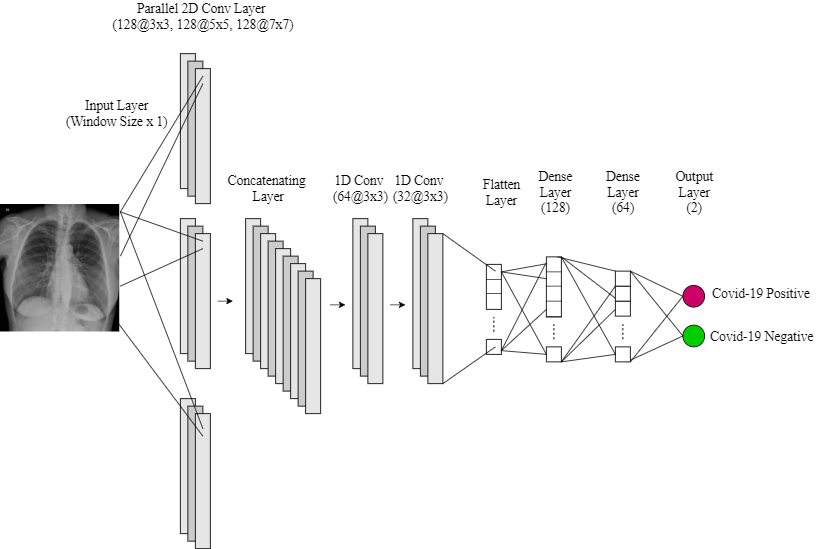

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto',save_weights_only=True)
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
18/18 [==============================] - 11s 496ms/step - loss: 0.5785 - accuracy: 0.7695 - val_loss: 0.5907 - val_accuracy: 0.8871
Epoch 2/20
18/18 [==============================] - 8s 457ms/step - loss: 0.5561 - accuracy: 0.7985 - val_loss: 0.2983 - val_accuracy: 0.8871
Epoch 3/20
18/18 [==============================] - 8s 455ms/step - loss: 0.4168 - accuracy: 0.8584 - val_loss: 0.2635 - val_accuracy: 0.9194
Epoch 4/20
18/18 [==============================] - 8s 454ms/step - loss: 0.3853 - accuracy: 0.8675 - val_loss: 0.2098 - val_accuracy: 0.9516
Epoch 5/20
18/18 [==============================] - 8s 454ms/step - loss: 0.3627 - accuracy: 0.8748 - val_loss: 0.1536 - val_accuracy: 0.9677
Epoch 6/20
18/18 [==============================] - 8s 455ms/step - loss: 0.3252 - accuracy: 0.9002 - val_loss: 0.1580 - val_accuracy: 0.9677
Epoch 7/20
18/18 [==============================] - 8s 451ms/step - loss: 0.3317 - accuracy: 0.8875 - val_loss: 0.2279 - val_accuracy: 0.9194
Epoch

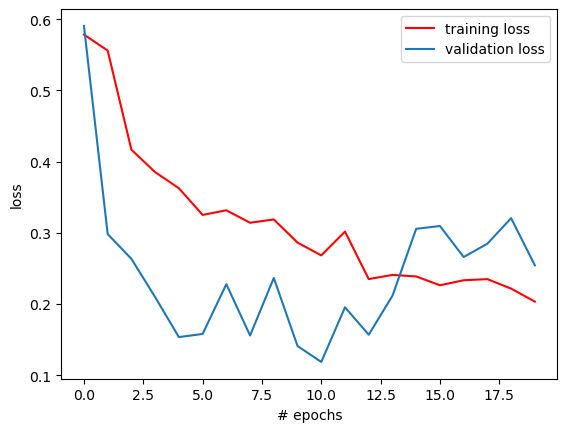

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

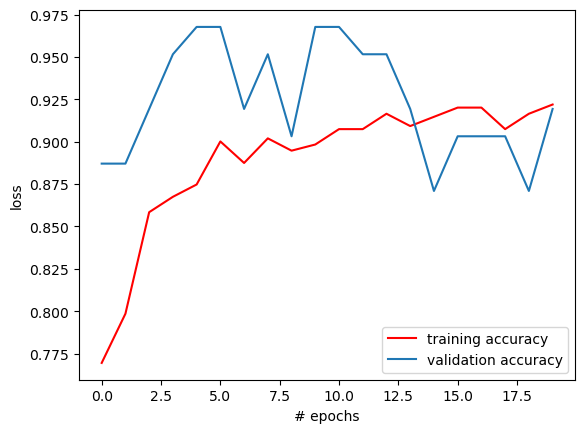

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 0s 73ms/step - loss: 0.7013 - accuracy: 0.8116
[0.7012704610824585, 0.8115941882133484]
